In [1]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [2]:
# Question 1
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("Housing.csv")

# Display the first 5 rows of the dataset
print(df.head())

# Get dataset info (column types, missing values, etc.)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert categorical variables into numerical (e.g., yes/no → 1/0)
df_processed = pd.get_dummies(df, drop_first=True)

# Display the processed dataset
print("\nProcessed Dataset Preview:")
print(df_processed.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns

In [4]:
# Question 2
from sklearn.model_selection import train_test_split

# Without scaling
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (436, 12)
Test set shape: (109, 12)


In [7]:
# Question 3
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [9]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 260032.35760741215
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


In [11]:
# Question 4
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


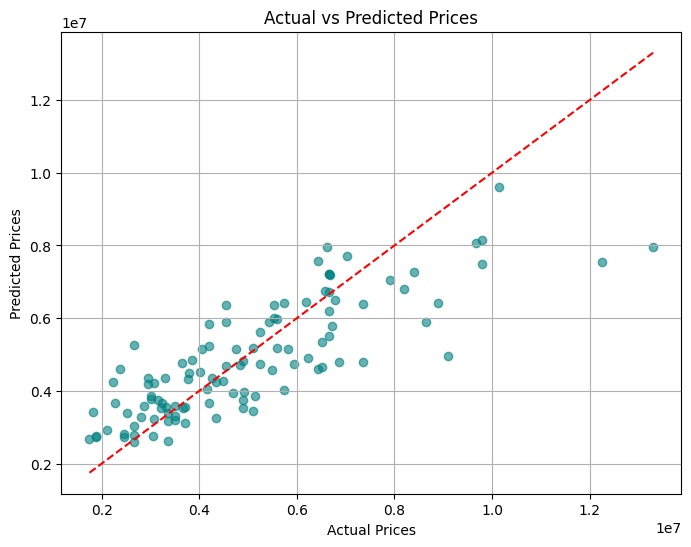

In [12]:
# Question 5
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


In [13]:
# Match feature names with coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

# Sort by absolute value for better readability
coefficients["Abs Coef"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Abs Coef", ascending=False).drop("Abs Coef", axis=1)

print(coefficients)


                            Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
12     furnishingstatus_unfurnished -4.136451e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
11  furnishingstatus_semi-furnished -1.268818e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
